In [2]:
import matplotlib.pyplot as plt
import numpy as np

def invert_grayscale(images):
    """ Makes black white, and white black """
    return 255 - images

In [3]:
def vector_to_matrix(img):
    
    """Reshapes normal image to (batch,28*28) to matrix (batch,28,28)"""
    return np.reshape(img, (-1, 28, 28))

In [4]:
def get_image(to_visualise, do_invert=True):
    to_visualise = vector_to_matrix(to_visualise)
    if do_invert:
        to_visualise = invert_grayscale(to_visualise)
    return create_image(to_visualise)

In [5]:
def create_image(images):
    import numpy as np
    """Returns a image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))

    finimage = np.ones((img_h * n_plots, img_w * n_plots))

    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                finimage[i * img_h:(i + 1) * img_h,
                j * img_w:(j + 1) * img_w] = this_img

    return finimage

In [6]:
def load_obj(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

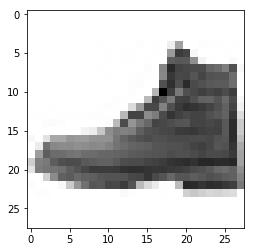

In [7]:
X, Y = load_obj('Datasets', kind='train')

labels = ['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
Y_str = np.array([labels[j] for j in Y])


#np.savetxt('Xtest.tsv', X, fmt='%.6e', delimiter='\t')
#np.savetxt('Ytest.tsv', Y_str, fmt='%s')

plt.imshow(get_image(X[50000]), cmap='gray')
#print(X[4])

In [8]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print("Number of train data - " + str(len(X_train)))
print("Number of test data - " + str(len(x_test)))

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()


dtree.fit(X_train, y_train)


y_hat=dtree.predict(x_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' %accuracy_score(y_test, y_hat))

Number of train data - 48000
Number of test data - 12000
Accuracy: 0.79


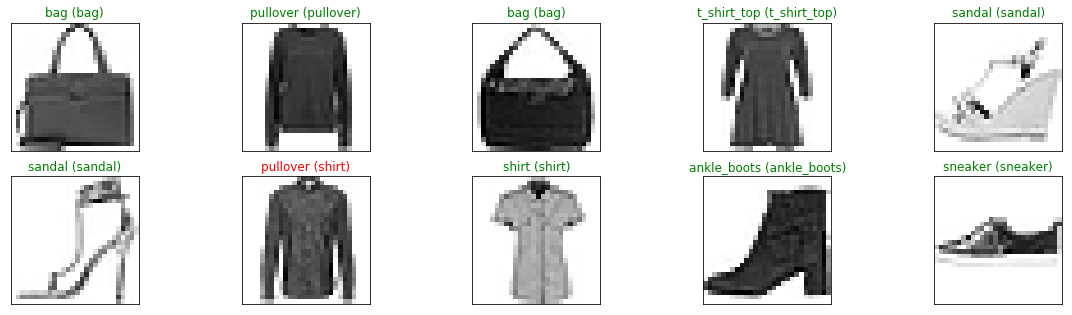

In [9]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[1], size=10, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(get_image(x_test[index])),cmap='gray')
    predict_index = y_hat[index]
    #print(predict_index)
    true_index = y_test[index]
    #print(true_index)
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Confusion matrix, without normalization
[[ 871    3   22   59    9    1  186    1   13    1]
 [   7 1159    1   32    6    0    6    0    2    0]
 [  42    3  813   28  166    0  166    1   13    0]
 [  51   31   27  958   67    4   64    0    5    2]
 [  16    6  180   56  750    0  133    1   17    0]
 [   1    2    2    4    2 1064    2   80   13   47]
 [ 179    9  153   45  140    3  625    2   20    2]
 [   0    0    0    0    1   56    0 1056    5   97]
 [  13    4   16   12   15   13   24    3 1069    9]
 [   1    0    3    2    1   31    3   87    7 1098]]


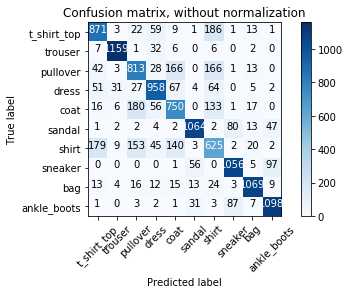

Normalized confusion matrix
[[7.47e-01 2.57e-03 1.89e-02 5.06e-02 7.72e-03 8.58e-04 1.60e-01 8.58e-04
  1.11e-02 8.58e-04]
 [5.77e-03 9.55e-01 8.24e-04 2.64e-02 4.95e-03 0.00e+00 4.95e-03 0.00e+00
  1.65e-03 0.00e+00]
 [3.41e-02 2.44e-03 6.60e-01 2.27e-02 1.35e-01 0.00e+00 1.35e-01 8.12e-04
  1.06e-02 0.00e+00]
 [4.22e-02 2.56e-02 2.23e-02 7.92e-01 5.54e-02 3.31e-03 5.29e-02 0.00e+00
  4.14e-03 1.65e-03]
 [1.38e-02 5.18e-03 1.55e-01 4.83e-02 6.47e-01 0.00e+00 1.15e-01 8.63e-04
  1.47e-02 0.00e+00]
 [8.22e-04 1.64e-03 1.64e-03 3.29e-03 1.64e-03 8.74e-01 1.64e-03 6.57e-02
  1.07e-02 3.86e-02]
 [1.52e-01 7.64e-03 1.30e-01 3.82e-02 1.19e-01 2.55e-03 5.31e-01 1.70e-03
  1.70e-02 1.70e-03]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 8.23e-04 4.61e-02 0.00e+00 8.69e-01
  4.12e-03 7.98e-02]
 [1.10e-02 3.40e-03 1.36e-02 1.02e-02 1.27e-02 1.10e-02 2.04e-02 2.55e-03
  9.07e-01 7.64e-03]
 [8.11e-04 0.00e+00 2.43e-03 1.62e-03 8.11e-04 2.51e-02 2.43e-03 7.06e-02
  5.68e-03 8.91e-01]]


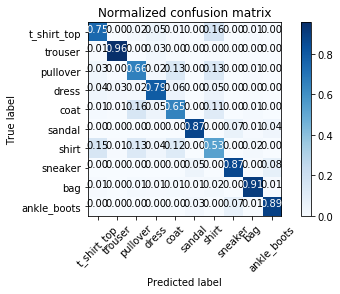

In [14]:
plt.show()
            
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
